In [53]:
import numpy as np
import matplotlib.pyplot as plt



# Initialising Values 
### defining position limit s

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Number of steps and positions
n_steps = 100
n_positions = 2 * n_steps + 1  
# Define the coin operator (Hadamard-like)
coin = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],
                 [1/np.sqrt(2), -1/np.sqrt(2)]])

# Define the vectors
up = np.array([1, 0])
down = np.array([0, 1])

# Reshape up to be a column vector
up_t = up.reshape(-1, 1)

# Perform the outer product
up_matrix = up_t @ up.reshape(1, -1)

down_t = down.reshape(-1,1)
down_matrix = down_t @ down.reshape(1,-1)
 
### Writing the shift operator 
#### - thus S = |↓><↓ | x Σ|i-1> < i|  + Σ|i+1> < i| x |↑ > <↑ |  
n = n_positions
S_right = np.zeros((n,n))
for i in range(0,n-1):
    S_right[i+1][i] = 1
S_left = np.zeros((n,n))
for i in range(1,n):
    S_left[i-1][i] =1 
n = n_positions
S_right = np.zeros((n,n))
for i in range(0,n-1):
    S_right[i+1][i] = 1
S_left = np.zeros((n,n))
for i in range(1,n):
    S_left[i-1][i] =1 
S1 = np.kron(up_matrix,S_right)
S2 = np.kron(down_matrix,S_left)
S = S1 + S2



#### Define the coin operator (Hadamard-like)

In [55]:

# coin = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],
#                  [1/np.sqrt(2), -1/np.sqrt(2)]])

# Y_coin = np.array([[1/np.sqrt(2), 1j/np.sqrt(2)],
#                  [1j/np.sqrt(2), 1/np.sqrt(2)]])


### Writing the shift operator 
#### - thus S = |↓><↓ | x Σ|i-1> < i|  + Σ|i+1> < i| x |↑ > <↑ |  

In [56]:
# # Define the vectors
# up = np.array([1, 0])
# down = np.array([0, 1])

# # Reshape up to be a column vector
# up_t = up.reshape(-1, 1)

# # Perform the outer product
# up_matrix = up_t @ up.reshape(1, -1)

# down_t = down.reshape(-1,1)
# down_matrix = down_t @ down.reshape(1,-1)


### Writing the shift matrices 


In [57]:
# n = n_positions
# S_right = np.zeros((n,n))
# for i in range(0,n-1):
#     S_right[i+1][i] = 1
# S_left = np.zeros((n,n))
# for i in range(1,n):
#     S_left[i-1][i] =1 
# S1 = np.kron(up_matrix,S_right)
# S2 = np.kron(down_matrix,S_left)
# S = S1 + S2


## Defining the Initial State 
### Spin (X) Position State 

In [58]:

zero = np.zeros(n_positions)  # |0> in position space
zero[n_steps] = 1  # Start at position 0 (center of the position array)
initial_state = np.kron(up, zero)

# print(initial_state)
# Perform the random walk
# state = initial_state.reshape(2, n_positions)

In [59]:
def coin_change(i):
    theta = (2*np.pi*i)/n_steps
    coin = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
    coin_adj= np.kron(coin,np.eye(n,n))
    return coin_adj

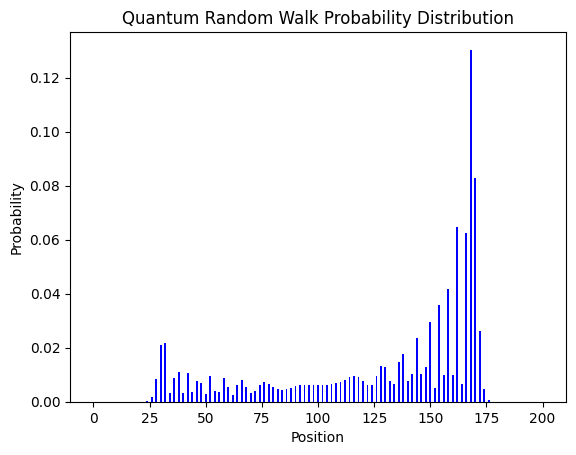

In [ ]:
#positon space
zero_ket = np.zeros(n_positions)
zero_ket[n_steps] = 1
initial_state = np.kron(up,zero_ket)
state = initial_state
coin_adjusted = np.kron(coin,np.eye(n,n))
for _ in range(n_steps):
    state = coin_adjusted @ state 
    state = S @ state 
# print(state )
# Step 1: Extract the probability coefficients
probability_amplitudes = np.abs(state)**2  # Square of the modulus gives the probability
# Step 2: Sum the probabilities for each position
probabilities = np.array([probability_amplitudes[i] + probability_amplitudes[i + n] for i in range(n)])
# Step 3: Plot the histogram
positions = np.arange(n)
plt.bar(positions, probabilities, color='blue')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.title('Quantum Random Walk Probability Distribution')
plt.show()

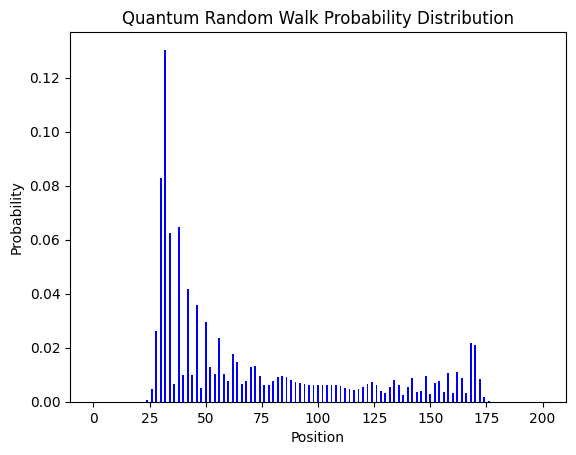

In [ ]:

zero_ket = np.zeros(n_positions)
zero_ket[n_steps] = 1
initial_state = np.kron(down,zero_ket)
state = initial_state
coin_adjusted = np.kron(coin,np.eye(n,n))
for _ in range(n_steps):
    state = coin_adjusted @ state 
    state = S @ state 
probability_amplitudes = np.abs(state)**2  
probabilities = np.array([probability_amplitudes[i] + probability_amplitudes[i + n] for i in range(n)])
positions = np.arange(n)
plt.bar(positions, probabilities, color='blue')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.title('Quantum Random Walk Probability Distribution')
plt.show()

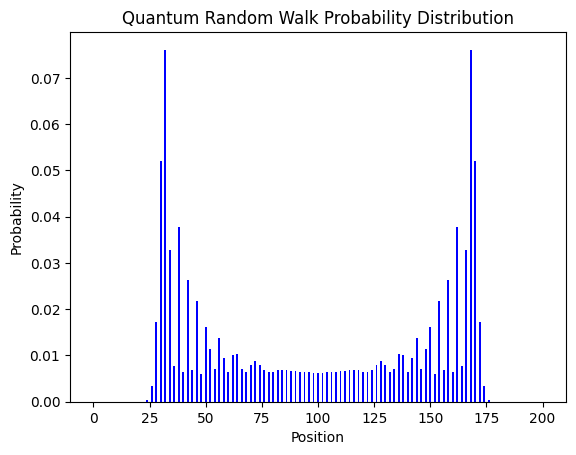

In [ ]:
#write the inital to be a super Positon state 
up_coef = 1/np.sqrt(2)
down_coef = 1j/np.sqrt(2)
spin_superpos = up_coef*up + down_coef*down
#positon space
zero_ket = np.zeros(n_positions)
zero_ket[n_steps] = 1
initial_state = np.kron(spin_superpos,zero_ket)
state = initial_state
coin_adjusted = np.kron(coin,np.eye(n,n))
for _ in range(n_steps):
    state = coin_adjusted @ state 
    state = S @ state 
# Step 1: Extract the probability coefficients
probability_amplitudes = np.abs(state)**2  # Square of the modulus gives the probability
# Step 2: Sum the probabilities for each position
probabilities = np.array([probability_amplitudes[i] + probability_amplitudes[i + n] for i in range(n)])
# Step 3: Plot the histogram
positions = np.arange(n)
plt.bar(positions, probabilities, color='blue')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.title('Quantum Random Walk Probability Distribution')
plt.show()


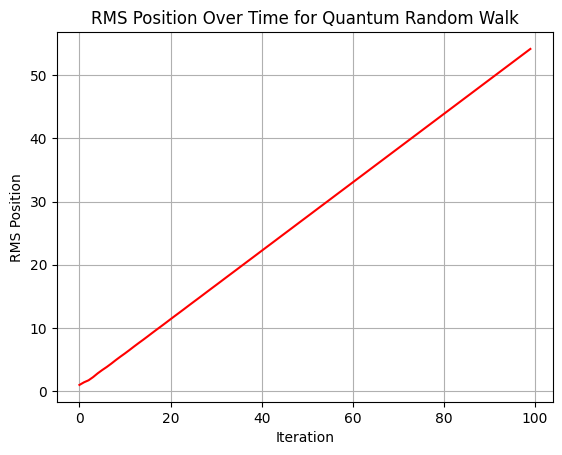

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Number of steps and positions
n_steps = 100
n_positions = 2 * n_steps + 1  

# Define the coin operator (Hadamard-like)
coin = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],
                 [1/np.sqrt(2), -1/np.sqrt(2)]])

# Define the vectors
up = np.array([1, 0])
down = np.array([0, 1])

# Reshape up to be a column vector
up_t = up.reshape(-1, 1)
up_matrix = up_t @ up.reshape(1, -1)

down_t = down.reshape(-1, 1)
down_matrix = down_t @ down.reshape(1, -1)

# Define the shift operator
n = n_positions
S_right = np.zeros((n, n))
for i in range(0, n - 1):
    S_right[i + 1][i] = 1
S_left = np.zeros((n, n))
for i in range(1, n):
    S_left[i - 1][i] = 1
S1 = np.kron(up_matrix, S_right)
S2 = np.kron(down_matrix, S_left)
S = S1 + S2

# Define the initial state
zero_ket = np.zeros(n_positions)
zero_ket[n_steps] = 1  # Start at the origin
initial_state = np.kron(up, zero_ket)

# Initialize state and operators
state = initial_state
coin_adjusted = np.kron(coin, np.eye(n, n))

# Prepare arrays for tracking probabilities and RMS
rms_values = []

# Define position indices (centered at 0)
positions = np.arange(-n_steps, n_steps + 1)

# Perform the quantum random walk
for step in range(n_steps):
    state = coin_adjusted @ state  # Apply the coin operator
    state = S @ state  # Apply the shift operator
    
    # Calculate probabilities
    probability_amplitudes = np.abs(state) ** 2
    probabilities = np.array([probability_amplitudes[i] + probability_amplitudes[i + n] for i in range(n)])
    
    # Calculate RMS for this step
    rms = np.sqrt(np.sum(probabilities * positions**2))
    rms_values.append(rms)

# Plot the RMS over iterations
plt.plot(range(n_steps), rms_values, color='red')
plt.xlabel('Iteration')
plt.ylabel('RMS Position')
plt.title('RMS Position Over Time for Quantum Random Walk')
plt.grid()
plt.show()


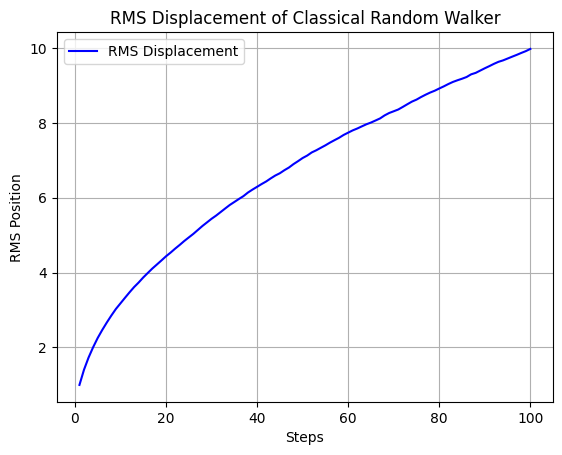

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Number of steps
n_steps = 100
n_trials = 10000  # Number of random walk trials for averaging

# Initialize storage for RMS calculations
displacements = []

# Simulate random walks
for _ in range(n_trials):
    steps = np.random.choice([-1, 1], size=n_steps)  # Random steps: -1 (left) or 1 (right)
    position = np.cumsum(steps)  # Cumulative sum gives position
    displacements.append(position)

# Convert to numpy array for calculations
displacements = np.array(displacements)

# Compute RMS for each step
rms = np.sqrt(np.mean(displacements**2, axis=0))

# Plot RMS displacement
plt.plot(range(1, n_steps + 1), rms, color='blue', label='RMS Displacement')
plt.xlabel('Steps')
plt.ylabel('RMS Position')
plt.title('RMS Displacement of Classical Random Walker')
plt.grid()
plt.legend()
plt.show()


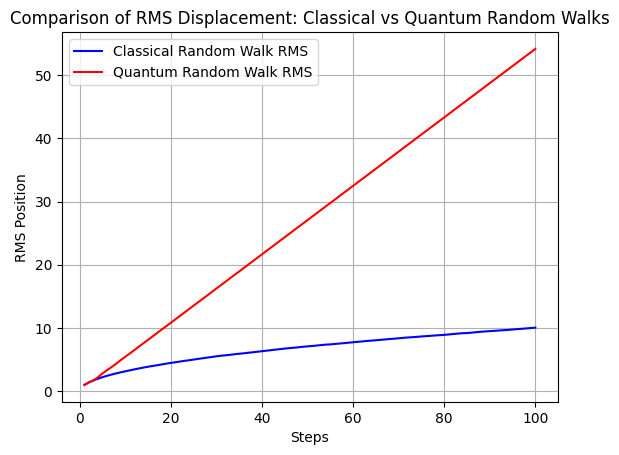

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Number of steps
n_steps = 100
n_trials = 10000  # Number of random walk trials for averaging

# Classical Random Walk RMS Calculation
classical_rms = []

# Simulate classical random walks
for _ in range(n_trials):
    steps = np.random.choice([-1, 1], size=n_steps)  # Random steps: -1 (left) or 1 (right)
    position = np.cumsum(steps)  # Cumulative sum gives position
    classical_rms.append(position)

# Convert to numpy array for calculations
classical_rms = np.array(classical_rms)

# Compute RMS for each step for classical random walk
classical_rms_values = np.sqrt(np.mean(classical_rms**2, axis=0))

# Quantum Random Walk RMS Calculation (same as the previous quantum walk code)
n_positions = 2 * n_steps + 1
coin = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],
                 [1/np.sqrt(2), -1/np.sqrt(2)]])

up = np.array([1, 0])
down = np.array([0, 1])

# Reshape up to be a column vector
up_t = up.reshape(-1, 1)
up_matrix = up_t @ up.reshape(1, -1)

down_t = down.reshape(-1, 1)
down_matrix = down_t @ down.reshape(1, -1)

# Define the shift operator for the quantum walk
n = n_positions
S_right = np.zeros((n, n))
for i in range(0, n - 1):
    S_right[i + 1][i] = 1
S_left = np.zeros((n, n))
for i in range(1, n):
    S_left[i - 1][i] = 1
S1 = np.kron(up_matrix, S_right)
S2 = np.kron(down_matrix, S_left)
S = S1 + S2

# Define the initial state for the quantum random walk
zero_ket = np.zeros(n_positions)
zero_ket[n_steps] = 1  # Start at the origin
initial_state = np.kron(up, zero_ket)

# Initialize state and operators
state = initial_state
coin_adjusted = np.kron(coin, np.eye(n, n))

# Prepare arrays for tracking quantum walk probabilities and RMS
quantum_rms_values = []

# Perform the quantum random walk
for step in range(n_steps):
    state = coin_adjusted @ state  # Apply the coin operator
    state = S @ state  # Apply the shift operator
    
    # Calculate probabilities for the quantum walk
    probability_amplitudes = np.abs(state) ** 2
    probabilities = np.array([probability_amplitudes[i] + probability_amplitudes[i + n] for i in range(n)])
    
    # Calculate RMS for the quantum walk
    rms = np.sqrt(np.sum(probabilities * np.arange(-n_steps, n_steps + 1)**2))
    quantum_rms_values.append(rms)

# Plotting both Classical and Quantum Random Walk RMS on the same graph
plt.plot(range(1, n_steps + 1), classical_rms_values, color='blue', label='Classical Random Walk RMS')
plt.plot(range(1, n_steps + 1), quantum_rms_values, color='red', label='Quantum Random Walk RMS')
plt.xlabel('Steps')
plt.ylabel('RMS Position')
plt.title('Comparison of RMS Displacement: Classical vs Quantum Random Walks')
plt.legend()
plt.grid()
plt.show()
